In [26]:
# Dependencies
import json
import requests
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from pprint import pprint
import pandas as pd
import numpy as np

In [29]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=15)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=15)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

15

In [34]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# add the coords to these lists
lats = []
lons = []
clouds = []
dates = []
list_of_cities = []

# start loop to get through our cities 
for city in cities:

    try:
        # Build query URL
        query_url = url + "appid=" + api_key + "&q=" + city

        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        # select the latitude/lon from the json response
        lat = weather_json["coord"]["lat"]
        lon = weather_json["coord"]["lon"]
        cloud = weather_json["clouds"]["all"]
        
        # select date and convert that code to Date using strftime
        date = weather_json["dt"]
        date = time.strftime("%D", time.localtime(int(date)))

        # add those results to the lists 
        lats.append(lat)
        lons.append(lon)
        clouds.append(cloud)
        dates.append(date)
        list_of_cities.append(city)
        
    #     pprint(weather_json)
    except:
        print("City not found")
        pass 
# eventually we want to get to a DF

# set up dictionary with the lists we created
weather_dict = {
    "Date": dates,
    "Cities": list_of_cities,
    "Lat": lats,
    "Lon": lons,
    "Cloudiness(%)": clouds
}

# put together our dictionary into a dataframe
df = pd.DataFrame(weather_dict)
print(df)

        Date       Cities      Lat       Lon  Cloudiness(%)
0   01/15/21      shimoda  34.6667  138.9500              9
1   01/15/21    sistranda  63.7256    8.8340             75
2   01/15/21      vaitape -16.5167 -151.7500             85
3   01/15/21     thompson  55.7435  -97.8558             75
4   01/15/21    kurayoshi  35.4333  133.8167             75
5   01/15/21    koulikoro  14.0000   -7.7500              0
6   01/15/21        vaini -21.2000 -175.2000             40
7   01/15/21      qaanaaq  77.4840  -69.3632            100
8   01/15/21  port alfred -33.5906   26.8910            100
9   01/15/21       koslan  63.4564   48.8989            100
10  01/15/21         lebu -37.6167  -73.6500             39
11  01/15/21         miri   4.4148  114.0089             40
12  01/15/21    paragould  36.0584  -90.4973              1
13  01/15/21       juneau  58.3019 -134.4197             90


In [9]:
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")
pprint(weather_json)

The weather API responded with: {'coord': {'lon': -2.2374, 'lat': 53.4809}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 273.28, 'feels_like': 270.24, 'temp_min': 273.15, 'temp_max': 273.71, 'pressure': 1029, 'humidity': 100}, 'visibility': 7000, 'wind': {'speed': 1.54, 'deg': 0}, 'clouds': {'all': 90}, 'dt': 1610728534, 'sys': {'type': 1, 'id': 1379, 'country': 'GB', 'sunrise': 1610698605, 'sunset': 1610727577}, 'timezone': 0, 'id': 2643123, 'name': 'Manchester', 'cod': 200}.
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 53.4809, 'lon': -2.2374},
 'dt': 1610728534,
 'id': 2643123,
 'main': {'feels_like': 270.24,
          'humidity': 100,
          'pressure': 1029,
          'temp': 273.28,
          'temp_max': 273.71,
          'temp_min': 273.15},
 'name': 'Manchester',
 'sys': {'country': 'GB',
         'id': 1379,
         'sunrise': 1610698605,
         'sunset': 1

In [21]:
t = weather_json["dt"]

In [23]:
import time
print(time.ctime(int(t)))
time.strftime("%D", time.localtime(int(t)))

Fri Jan 15 11:48:48 2021


'01/15/21'

In [35]:
#separate into two dataframes 
southern_hemi_df = df.loc[df['Lat'] < 0] 
southern_hemi_df.head()

,Date,Cities,Lat,Lon,Cloudiness(%)
2,01/15/21,vaitape,-16.5167,-151.750,85
6,01/15/21,vaini,-21.2000,-175.200,40
8,01/15/21,port alfred,-33.5906,26.891,100
10,01/15/21,lebu,-37.6167,-73.650,39


In [36]:
northern_hemi_df = df.loc[df['Lat'] >=0] 
northern_hemi_df.head()

,Date,Cities,Lat,Lon,Cloudiness(%)
0,01/15/21,shimoda,34.6667,138.9500,9
1,01/15/21,sistranda,63.7256,8.8340,75
3,01/15/21,thompson,55.7435,-97.8558,75
4,01/15/21,kurayoshi,35.4333,133.8167,75
5,01/15/21,koulikoro,14.0000,-7.7500,0


In [40]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [38]:
 def linregress_scatter(x_values, y_values):
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x_values,y_values)

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")

    # Label plot
    plt.xlabel('Lat')
    plt.ylabel('Cloudiness')

    # Print r square value
    print(f"R squared: {rvalue**2}")

    # Show plot
    plt.show()

R squared: 0.5716486513786503


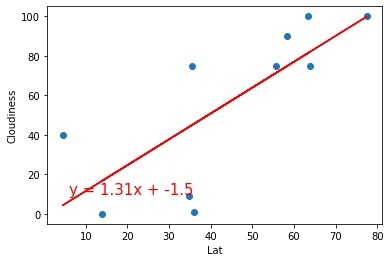

In [41]:
linregress_scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness(%)'])